In [10]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import GridSearchCV

In [2]:
model_1 = pd.read_excel('C:/Users/chhch/OneDrive/Documents/POSTECH/빅데이터프로젝트/model1_dataset.xlsx',sheet_name='Sheet1')
model_1

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,risk
0,C117780,194376.0,M,50,23.939481,83.0,85,130,0
1,C117780,-1869370.0,M,50,23.939481,83.0,85,130,1
2,C121178,-913949.0,M,30,24.816327,86.0,80,125,1
3,C116605,-1813374.0,M,50,26.259585,88.0,80,130,1
4,C129391,-4495124.0,F,35,19.227688,72.0,80,120,1
...,...,...,...,...,...,...,...,...,...
4752,C114658,-2521120.0,M,55,19.045073,74.0,70,120,1
4753,C117461,815720.0,M,50,26.423570,88.0,70,110,0
4754,C123990,331180.0,F,55,20.569330,85.0,80,120,0
4755,C126693,-1597780.0,F,50,22.718974,73.0,80,120,1


In [3]:
model_1 = pd.get_dummies(model_1.drop('customer_id',axis=1))

In [4]:
f = lambda x : 0 if x >0 else 1
model_1['risk'] = model_1['insu_risk_expense'].apply(f)

In [5]:
model_1_y = model_1['risk']
model_1_x = model_1.drop(['insu_risk_expense','risk'], axis =1, inplace = False)

In [6]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(model_1_x, model_1_y,\
                                               test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))


train data X size : (3329, 7)
train data Y size : (3329,)
test data X size : (1428, 7)
test data X size : (1428,)


In [11]:
tree_uncustomized = RandomForestClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on traing set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))


Score on traing set: 0.961
Score on test set: 0.541


In [12]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.938,0.519
1,20,0.958,0.535
2,30,0.960,0.539
3,40,0.960,0.539
4,50,0.961,0.541
5,60,0.961,0.544
6,70,0.961,0.544
7,80,0.961,0.547
8,90,0.961,0.546
9,100,0.961,0.541


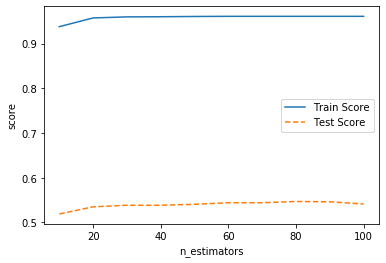

In [14]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [17]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 31)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234, n_estimators=80, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.961,0.547
1,2,0.904,0.533
2,3,0.859,0.515
3,4,0.817,0.529
4,5,0.786,0.535
5,6,0.763,0.523
6,7,0.742,0.525
7,8,0.736,0.531
8,9,0.726,0.522
9,10,0.713,0.529


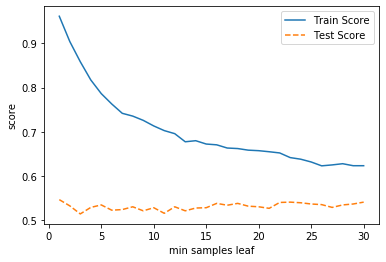

In [18]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel('score')
plt.xlabel("min samples leaf")
plt.legend()

In [22]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, n_estimators=80, min_samples_leaf=16, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.671,0.539
1,6,0.671,0.539
2,8,0.671,0.539
3,10,0.671,0.539
4,12,0.671,0.539
5,14,0.671,0.539
6,16,0.671,0.539
7,18,0.671,0.539
8,20,0.671,0.539
9,22,0.671,0.539


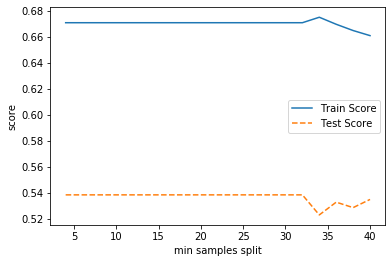

In [24]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [25]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators=80, min_samples_leaf=16, min_samples_split=20, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.540,0.539
1,2,0.551,0.543
2,3,0.559,0.536
3,4,0.573,0.539
4,5,0.582,0.529
5,6,0.599,0.536
6,7,0.613,0.536
7,8,0.628,0.537
8,9,0.635,0.525
9,10,0.651,0.525


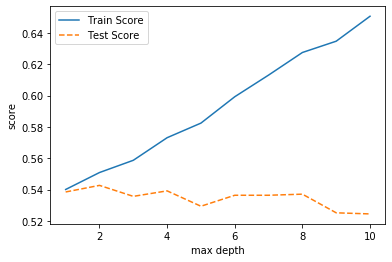

In [26]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

In [28]:
rf_final =RandomForestClassifier(random_state=1234, n_estimators=80, min_samples_leaf=16, min_samples_split=20, max_depth=4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

rf_final

Score on training set: 0.573
Score on test set: 0.539


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [31]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final, out_file = 'tree_finalRandomForestClassifier.dot', class_names = ['accept','bt'],
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_finalRandomForestClassifier.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
graph = graphviz.Source(dot_graph)
graph.format='png'
graph.render('dtree_render', view = True)

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [33]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,age,0.318
1,bmi,0.254
2,waist,0.191
4,bp_max,0.088
6,gender_M,0.056
3,bp_min,0.048
5,gender_F,0.045


Text(0, 0.5, 'variable')

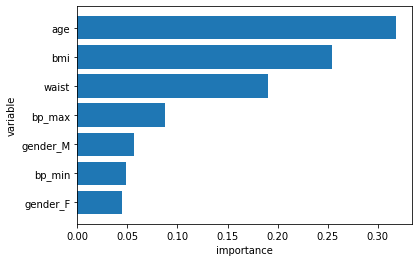

In [34]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('importance')
plt.ylabel('variable')